In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *

import pandas as pd
import numpy as np
import matplotlib.dates as mdates



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
df=pd.read_csv("./CSV/금리,환율_전처리.csv",index_col='일자',encoding='euc-kr')

In [7]:
df1=pd.read_csv("../LG화학 공매도.csv")

In [8]:
df2=df1.drop(labels=range(0,258),axis=0)

In [9]:
df2.set_index('일자', inplace=True)
print(df2)

            공매도 수량(전체)  공매도 수량(잔고수량)   공매도 금액(전체)  공매도 금액(잔고금액)
일자                                                             
2020-03-13       37208        412036  12160477500  1.402980e+11
2020-03-12       31971        406283  11199949500  1.387460e+11
2020-03-11       18948        428194   6973094500  1.562910e+11
2020-03-10       27342        442544  10225322500  1.652900e+11
2020-03-09       86757        471633  32931756500  1.763910e+11
...                ...           ...          ...           ...
2016-07-06       30263        185131   7550452500  4.600505e+10
2016-07-05        3094        185448    811968000  4.849465e+10
2016-07-04        8039        189697   2095278500  4.979546e+10
2016-07-01        9146        194513   2357332500  5.018435e+10
2016-06-30       24885        186804   6421511000  4.856904e+10

[909 rows x 4 columns]


In [11]:
df3=pd.merge(df,df2,left_on=['일자'],right_index=True)
df3

,금리,달러환율,공매도 수량(전체),공매도 수량(잔고수량),공매도 금액(전체),공매도 금액(잔고금액)
일자,,,,,,
2016-07-01,1.210,1152.6,9146,194513,2357332500,5.018435e+10
2016-07-04,1.224,1147.5,8039,189697,2095278500,4.979546e+10
2016-07-05,1.217,1148.1,3094,185448,811968000,4.849465e+10
2016-07-06,1.203,1153.0,30263,185131,7550452500,4.600505e+10
2016-07-07,1.208,1165.8,3380,185216,844582500,4.621139e+10
...,...,...,...,...,...,...
2020-03-09,1.038,1191.4,86757,471633,32931756500,1.763910e+11
2020-03-10,1.082,1201.4,27342,442544,10225322500,1.652900e+11
2020-03-11,1.086,1196.7,18948,428194,6973094500,1.562910e+11


In [12]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 6)

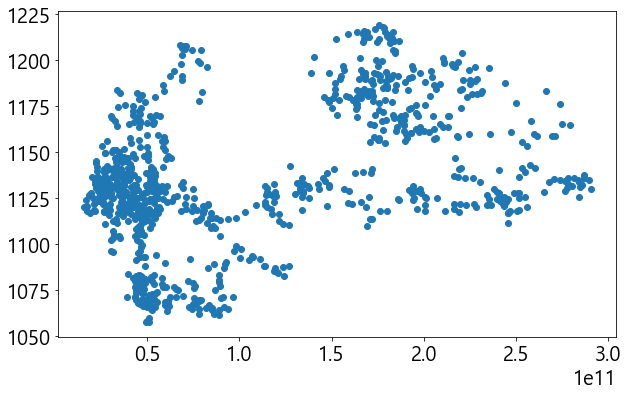

In [13]:
plt.scatter(df3['공매도 금액(잔고금액)'],df3['달러환율'])

In [18]:
pearsonr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

(0.3076561894960652, 5.544569565752476e-27)

In [19]:
spearmanr(df3['공매도 금액(잔고금액)'],df3['달러환율'])

SpearmanrResult(correlation=0.30294098628433136, pvalue=3.5725625192989343e-26)

Text(0.5, 1.0, 'LG 화학 공매도 금액과 환율')

Text(0, 0.5, '전체 거래대금(\\)')

Text(0.5, 0, 'Date')

Text(0, 0.5, '환율($->\\)')

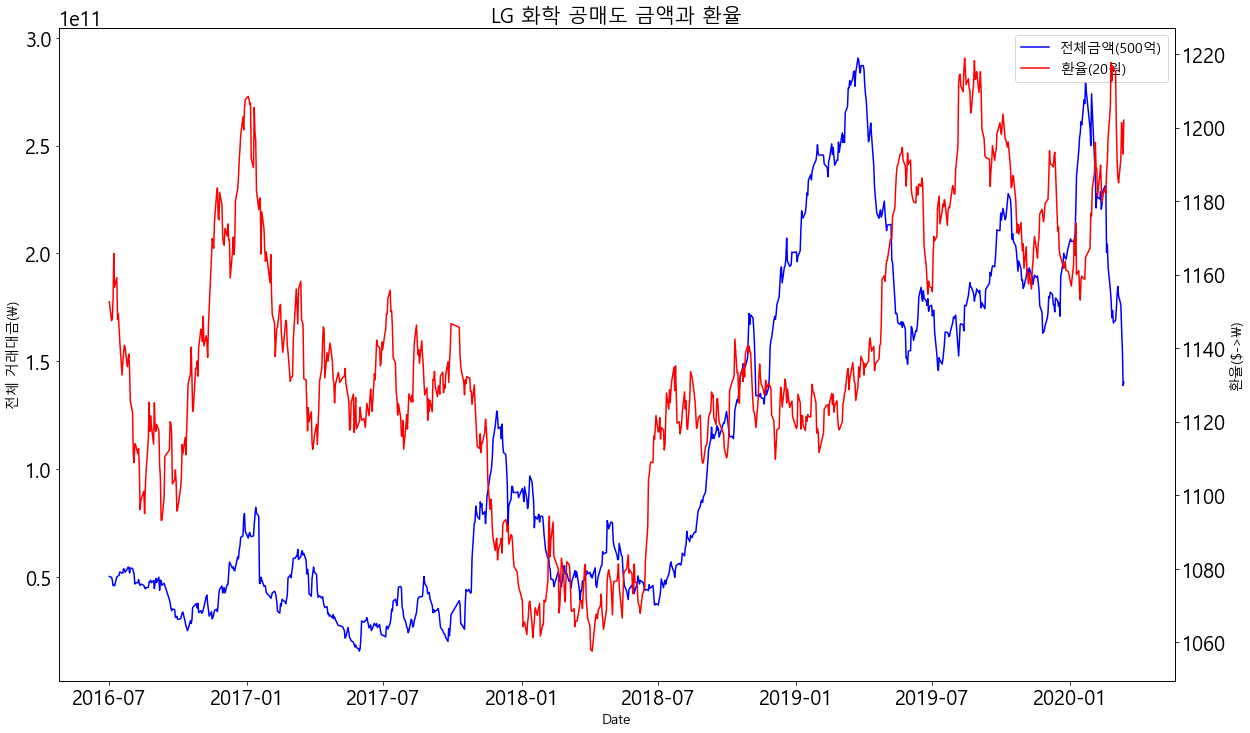

In [15]:
df3.index = pd.to_datetime(df3.index)

fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성
ax2 = ax.twinx()


line1=ax.plot(df3['공매도 금액(잔고금액)'], label='전체금액(500억)', color='b')
line2=ax2.plot(df3['달러환율'],label='환율(20원)', color='r')


ax.set_title('LG 화학 공매도 금액과 환율', fontsize=20) # 타이틀 설정
ax.set_ylabel('전체 거래대금(\)', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y1축 설정
ax2.set_ylabel('환율($->\)', fontsize=14)   #y2축 설정



lines= line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best',fontsize=14)

plt.show()